# Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tkinter as tk
import requests
from tkinter import ttk
from PIL import Image, ImageTk  
import webbrowser
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import yaml
import stauth
from yaml import SafeLoader
import io
from typing import Dict
from typing import List
import wikipediaapi
import streamlit as st
from streamlit_searchbox import st_searchbox

In [12]:
#!pip install matplotlib
#!pip install seaborn
#!pip install spotipy
#!pip install stauth
#!pip install pyyaml
#!pip install wikipedia-api
#!pip install streamlit
#!pip install streamlit_searchbox

# Code

# **Definitions of the dataframe **

- Timestamp - Date and time when form was submitted
- Age - Respondent's age
- Primary streaming service - Respondent's primary streaming service
- Hours per day - Number of hours the respondent listens to music per day
- While working - Does the respondent listen to music while studying/working?
- Instrumentalist - Does the respondent play an instrument regularly?
- Composer - Does the respondent compose music?
- Fav genre - Respondent's favorite or top genre
- Exploratory - Does the respondent actively explore new artists/genres?
- Foreign languages - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- BPM - Beats per minute of favorite genre
- Frequency [Classical] - How frequently the respondent listens to classical music
- Frequency [Country] - How frequently the respondent listens to country music
- Frequency [EDM] - How frequently the respondent listens to EDM music
- Frequency [Folk] - How frequently the respondent listens to folks music
- Frequency [Gospel] - How frequently the respondent listens to Gospel music
- Frequency [Hip hop] - How frequently the respondent listens to hip hop music
- Frequency [Jazz] - How frequently the respondent listens to jazz music
- Frequency [K pop] - How frequently the respondent listens to K pop music
- Frequency [Latin] - How frequently the respondent listens to Latin music
- Frequency [Lofi] - How frequently the respondent listens to lofi music
- Frequency [Metal] - How frequently the respondent listens to metal music
- Frequency [Pop] - How frequently the respondent listens to pop music
- Frequency [R&B] - How frequently the respondent listens to R&B music
- Frequency [Rap] -How frequently the respondent listens to rap music
- Frequency [Rock] - How frequently the respondent listens to rock music
- Frequency [Video game music] - How frequently the respondent listens to video game music
- Anxiety - Self-reported anxiety, on a scale of 0-10
- Depression - Self-reported depression, on a scale of 0-10
- Insomnia - Self-reported insomnia, on a scale of 0-10
- OCD - Self-reported OCD, on a scale of 0-10
- Music effects - Does music improve/worsen respondent's mental health conditions?
- Permissions - Permissions to publicize data

# First look at the data

In [13]:
music = pd.read_csv("survey_results.csv")
music.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [14]:
music.dtypes #types

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [15]:
music.isna().sum() #Nan values

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [16]:
music.duplicated().sum() # No duplicates

0

In [17]:
music.drop(["Timestamp","Permissions"], axis=1, inplace=True) # the columns I dropped didn't have relevant data 

In [18]:
music.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [19]:
music.shape

(736, 31)

# Handling the Null Values 

In [20]:
music.isna().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [21]:
#Less than 10 null values
music.dropna(subset=['Age','Primary streaming service','While working','Instrumentalist','Composer','Foreign languages','Music effects'],inplace=True)

In [22]:
#BPM has 107 null values, so we should fill the null values with the Median 
music['BPM']=music['BPM'].fillna(music['BPM'].median())

In [23]:
music.isna().sum() #CLEAN

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [24]:
music.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.392881e+06,5.837744,4.806407,3.717967,2.635097
std,11.953918,3.017779,3.731966e+07,2.784533,3.020061,3.084387,2.844382
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.400000e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


# Handling Outliers

**As noted using the .describe() method, we have three columns in particular that deserve closer attention:**

**Hours per day:** report of someone who listens to music 24 hours a day;

**BPM:** Column max value being 1.000000e+09 = 1,000,000,000;

**Age:** 75% of the data go up to 28 years of age, but the maximum recorded is 89.

In [25]:
music1=music[['Age','Hours per day','BPM']]

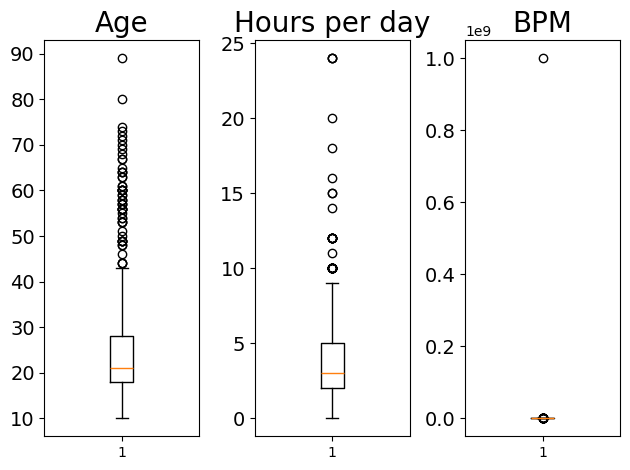

In [26]:
fig,axs=plt.subplots(1,3)
for i,ax in enumerate(axs.flat):
    ax.boxplot(music1.iloc[:,i])
    ax.set_title(music1.columns[i],fontsize=20)
    ax.tick_params(axis='y',labelsize=14)
    
plt.tight_layout()

In [27]:
q3_age = music[['Age']].quantile(0.75)
q1_age = music[['Age']].quantile(0.25)
t_age = q3_age-q1_age
#Upper fence
outliers_above_age = q3_age+3*t_age
#Lower Fence
outliers_below_age = q1_age-3*t_age

q3_hpd = music[['Hours per day']].quantile(0.75)
q1_hpd = music[['Hours per day']].quantile(0.25)
t_hpd = q3_hpd-q1_hpd
#Upper fence
outliers_above_hpd = q3_hpd+3*t_hpd
#Lower Fence
outliers_below_hpd = q1_hpd-3*t_hpd

q3_bpm = music[['BPM']].quantile(0.75)
q1_bpm = music[['BPM']].quantile(0.25)
t_bpm = q3_bpm-q1_bpm
#Upper fence
outliers_above_bpm = q3_bpm+3*t_bpm
#Lower Fence
outliers_below_bpm = q1_bpm-3*t_bpm

In [28]:
print(outliers_above_age)
print(outliers_above_hpd)
print(outliers_above_bpm)

Age    58.0
dtype: float64
Hours per day    14.0
dtype: float64
BPM    245.0
dtype: float64


In [29]:
print(outliers_below_age)
print(outliers_below_hpd)
print(outliers_below_bpm)

Age   -12.0
dtype: float64
Hours per day   -7.0
dtype: float64
BPM    0.0
dtype: float64


In [30]:
#Drop outliers 
music = music.loc[~(music['Age'] > 58.0)]
music = music.loc[~(music['Hours per day'] > 14.0)]
music = music.loc[~(music['BPM'] > 245.0)]
music.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,23.599707,3.418328,123.079179,5.906891,4.866569,3.716276,2.680352
std,8.818426,2.498598,31.112220,2.763656,3.004245,3.067127,2.862184
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,105.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,26.000000,5.000000,140.000000,8.000000,7.000000,6.000000,5.000000
max,58.000000,14.000000,220.000000,10.000000,10.000000,10.000000,10.000000


In [31]:
#Now we can only see a Count of 682, that is less than the original 738.

1. What music genres do people with high levels of anxiety, depression, insomnia and OCD listen to more frequently?
2. Which BPM rank has more listeners?
3. Considering 90 BPM as high level music regarding Dr. Emma Gray's investigation, Can we confirm that people listening to music over 90 BPM presents higher levels of anxiety, depression, insomnia and OCD than people listening to music under that level?

<Axes: >

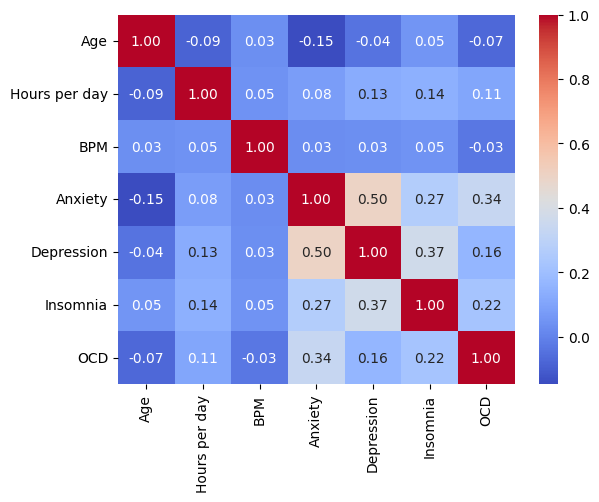

In [32]:
corr = music[["Age", "Hours per day", "BPM", "Anxiety", "Depression", "Insomnia", "OCD"]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


1. There is a strong direct correlation between Anxiety and Depression
2. Moderate correlation between Depression and Insomnia
3. Moderate correlation between Anxiety and OCD

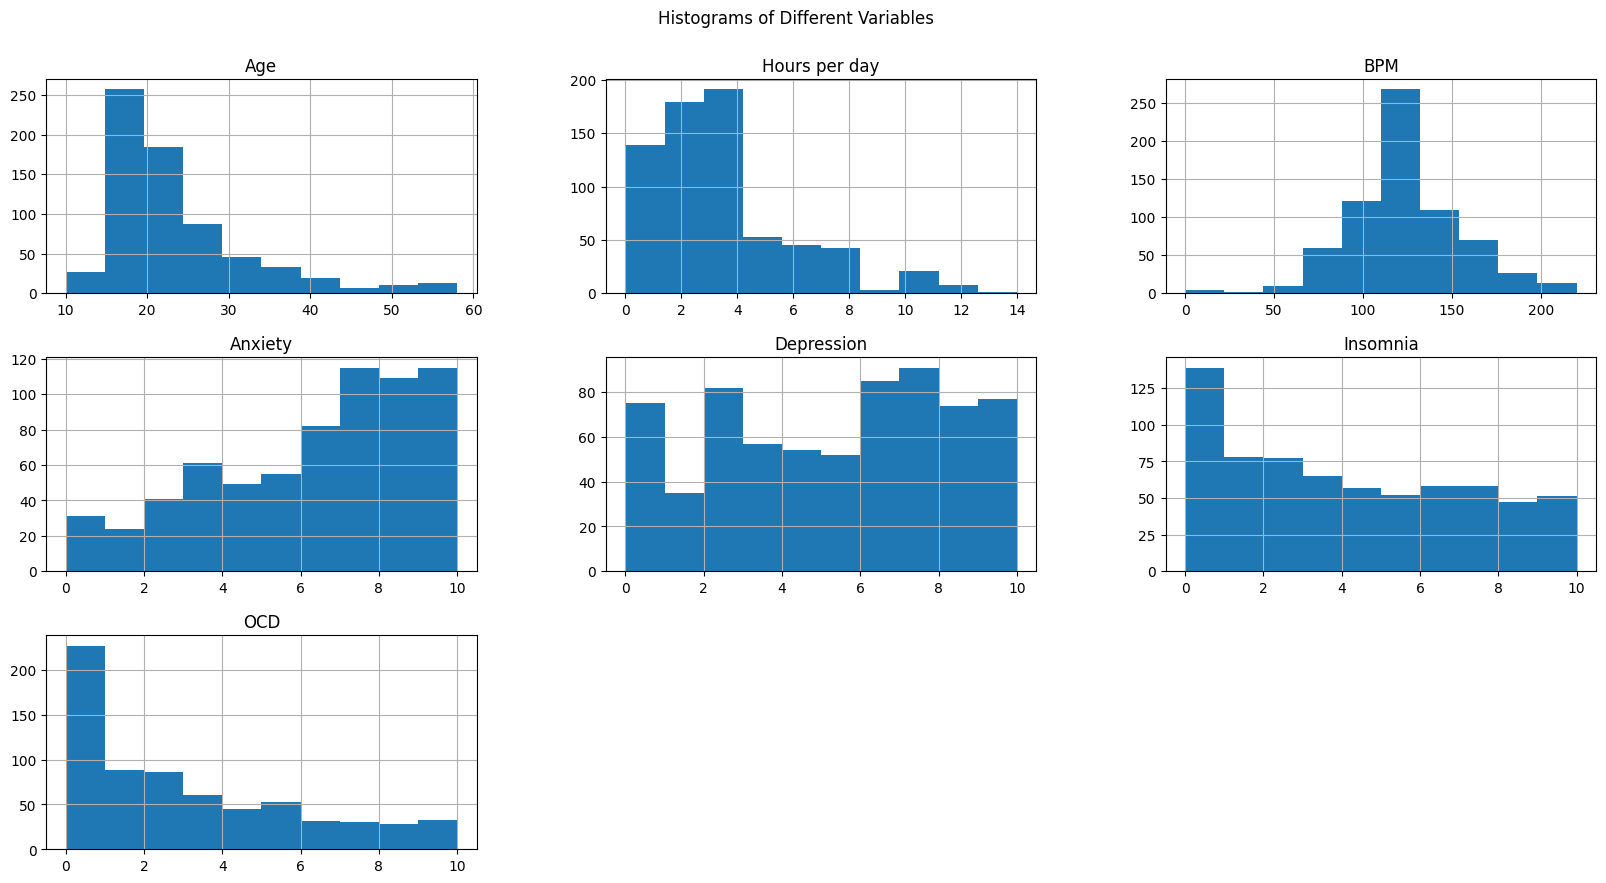

In [33]:
columns_to_plot = ["Age", "Hours per day", "BPM", "Anxiety", "Depression", "Insomnia", "OCD"]

music[columns_to_plot].hist(bins=10, figsize=(20, 10))
plt.suptitle("Histograms of Different Variables", y=0.95)
plt.show()


1. Captures more data of people between ages 15-25
2. Most people listen to music for 1-4 hrs per day
3. Beats per Minute usually ranges between 100-150
4. Most people in the dataset deal with Anxiety and Depression

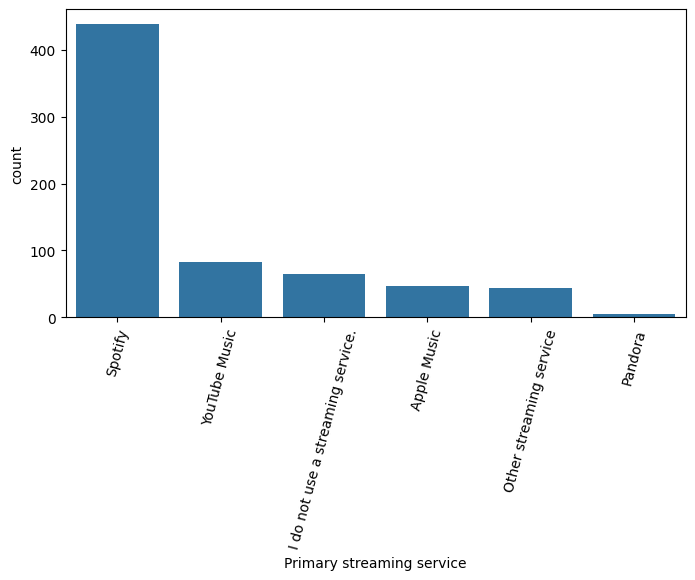

In [34]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=music['Primary streaming service'])
plt.xticks(rotation=75)
plt.show()

Spotify is the most used streaming service among the participants

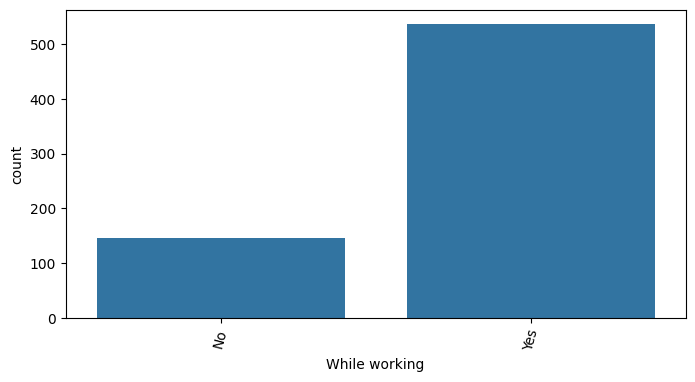

In [35]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=music['While working'])
plt.xticks(rotation=75)
plt.show()

Majority listeners listen to music while working

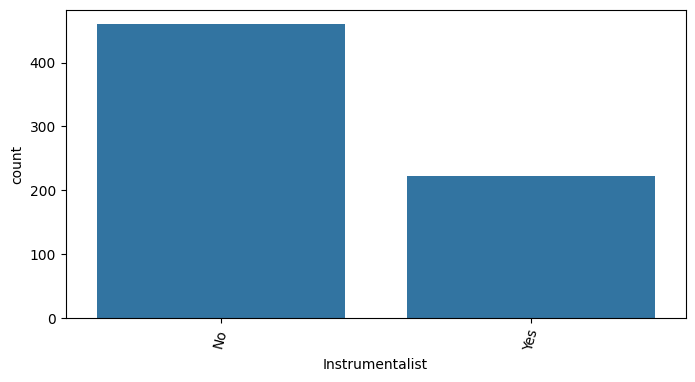

In [36]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=music['Instrumentalist'])
plt.xticks(rotation=75)
plt.show()

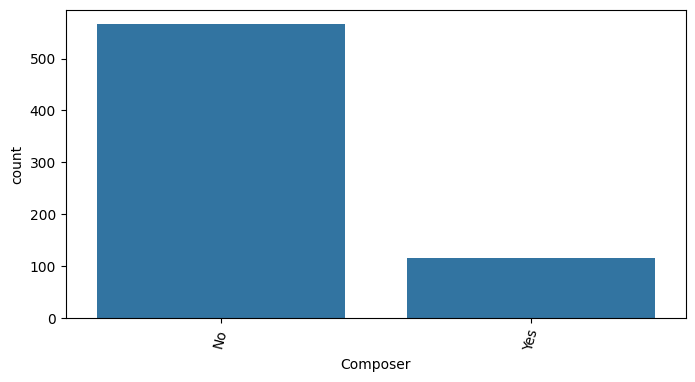

In [37]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=music['Composer'])
plt.xticks(rotation=75)
plt.show()

Most participants of the survey do not use a music instrument to play or compose music

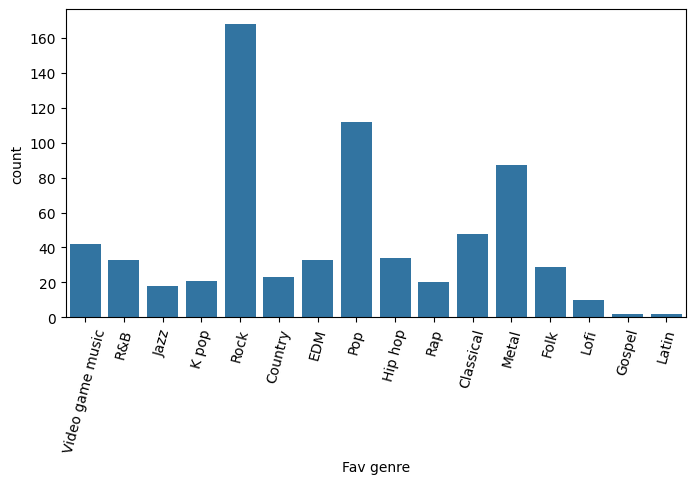

In [38]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=music['Fav genre'])
plt.xticks(rotation=75)
plt.show()

Rock, Pop and Metal are amongst the most commonly heard music

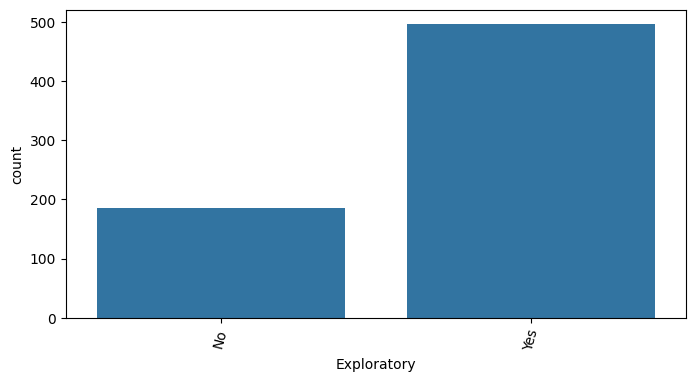

In [39]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=music['Exploratory'])
plt.xticks(rotation=75)
plt.show()

Many of the participants do explore new artists or genres

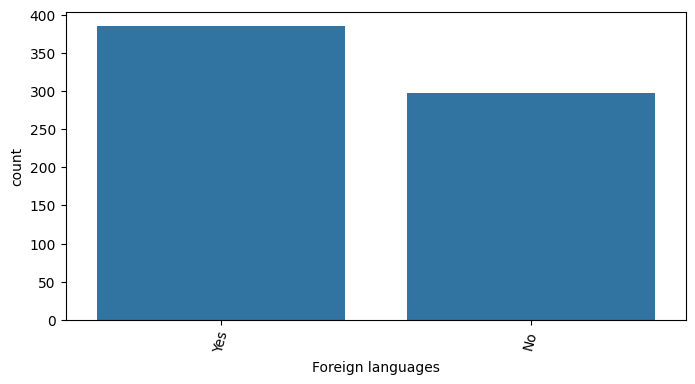

In [40]:
fig=plt.figure(figsize=(8,4))
sns.countplot(x=music['Foreign languages'])
plt.xticks(rotation=75)
plt.show()

Most of the participants regularly listen to music with lyrics in a language they are not fluent in

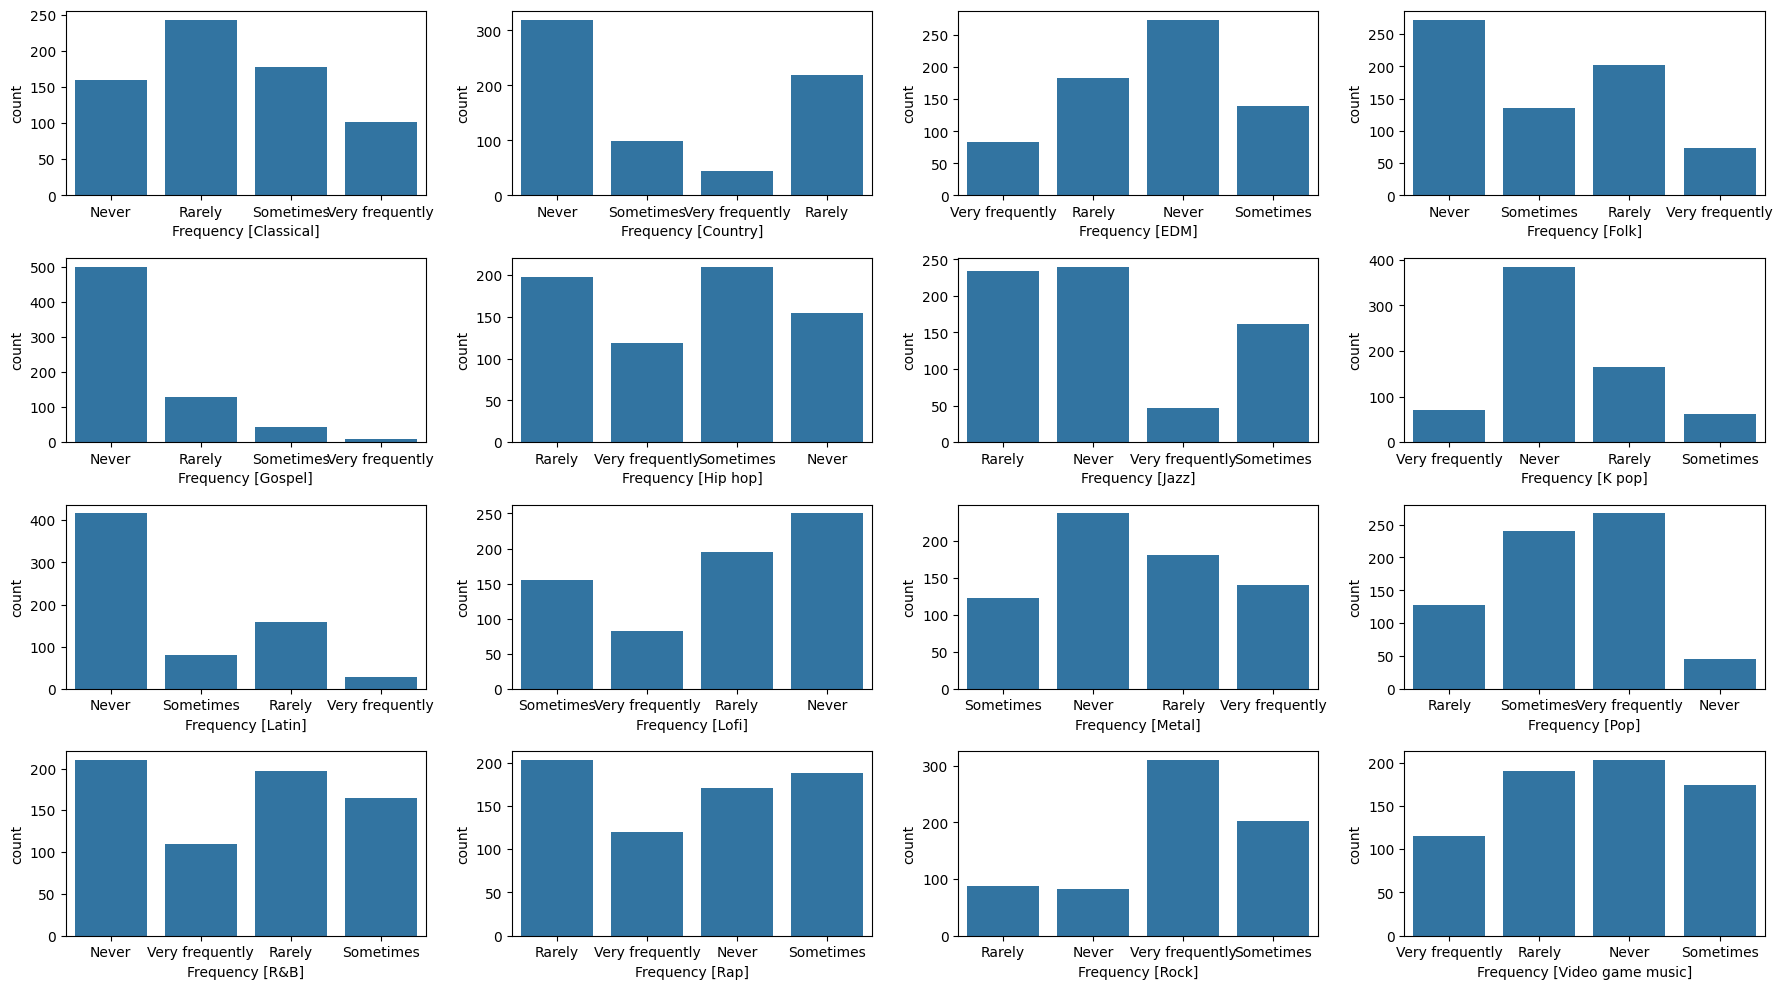

In [41]:
figure,axes=plt.subplots(4,4,figsize=(18,10))
sns.countplot(ax=axes[0,0],x=music['Frequency [Classical]'])
sns.countplot(ax=axes[0,1],x=music['Frequency [Country]'])

sns.countplot(ax=axes[0,2],x=music['Frequency [EDM]'])

sns.countplot(ax=axes[0,3],x=music['Frequency [Folk]'])

sns.countplot(ax=axes[1,0],x=music['Frequency [Gospel]'])

sns.countplot(ax=axes[1,1],x=music['Frequency [Hip hop]'])

sns.countplot(ax=axes[1,2],x=music['Frequency [Jazz]'])

sns.countplot(ax=axes[1,3],x=music['Frequency [K pop]'])

sns.countplot(ax=axes[2,0],x=music['Frequency [Latin]'])

sns.countplot(ax=axes[2,1],x=music['Frequency [Lofi]'])

sns.countplot(ax=axes[2,2],x=music['Frequency [Metal]'])

sns.countplot(ax=axes[2,3],x=music['Frequency [Pop]'])

sns.countplot(ax=axes[3,0],x=music['Frequency [R&B]'])

sns.countplot(ax=axes[3,1],x=music['Frequency [Rap]'])

sns.countplot(ax=axes[3,2],x=music['Frequency [Rock]'])

sns.countplot(ax=axes[3,3],x=music['Frequency [Video game music]'])


plt.tight_layout()

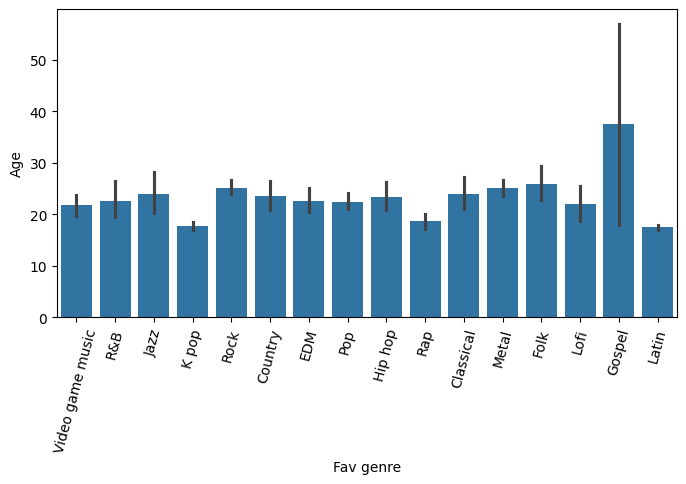

In [42]:
fig=plt.figure(figsize=(8,4))
sns.barplot(x=music['Fav genre'],y=music['Age'])
plt.xticks(rotation=75)
plt.show()

1. Listeners in the age group of 35+ listen to Gospel Music more
2. Listeners in the age group below 20 like to listen to K-pop, Rap and Latin

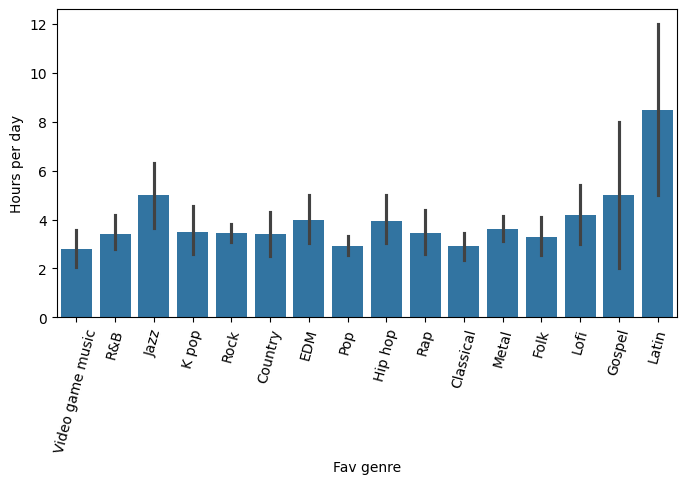

In [43]:
fig=plt.figure(figsize=(8,4))
sns.barplot(x=music['Fav genre'],y=music['Hours per day'])
plt.xticks(rotation=75)
plt.show()

Latin music is heard the most followed by Gospel and Jazz music

C:\Users\maria\AppData\Local\Temp\ipykernel_8348\1777893929.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[0,0],x=music['Fav genre'],y=music['Insomnia'],ci=None)
C:\Users\maria\AppData\Local\Temp\ipykernel_8348\1777893929.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[0,1],x=music['Fav genre'],y=music['OCD'],ci=None)
C:\Users\maria\AppData\Local\Temp\ipykernel_8348\1777893929.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[1,0],x=music['Fav genre'],y=music['Depression'],ci=None)
C:\Users\maria\AppData\Local\Temp\ipykernel_8348\1777893929.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[1,1],x=music['Fav genre'],y=music['Anxiety'],ci=None)


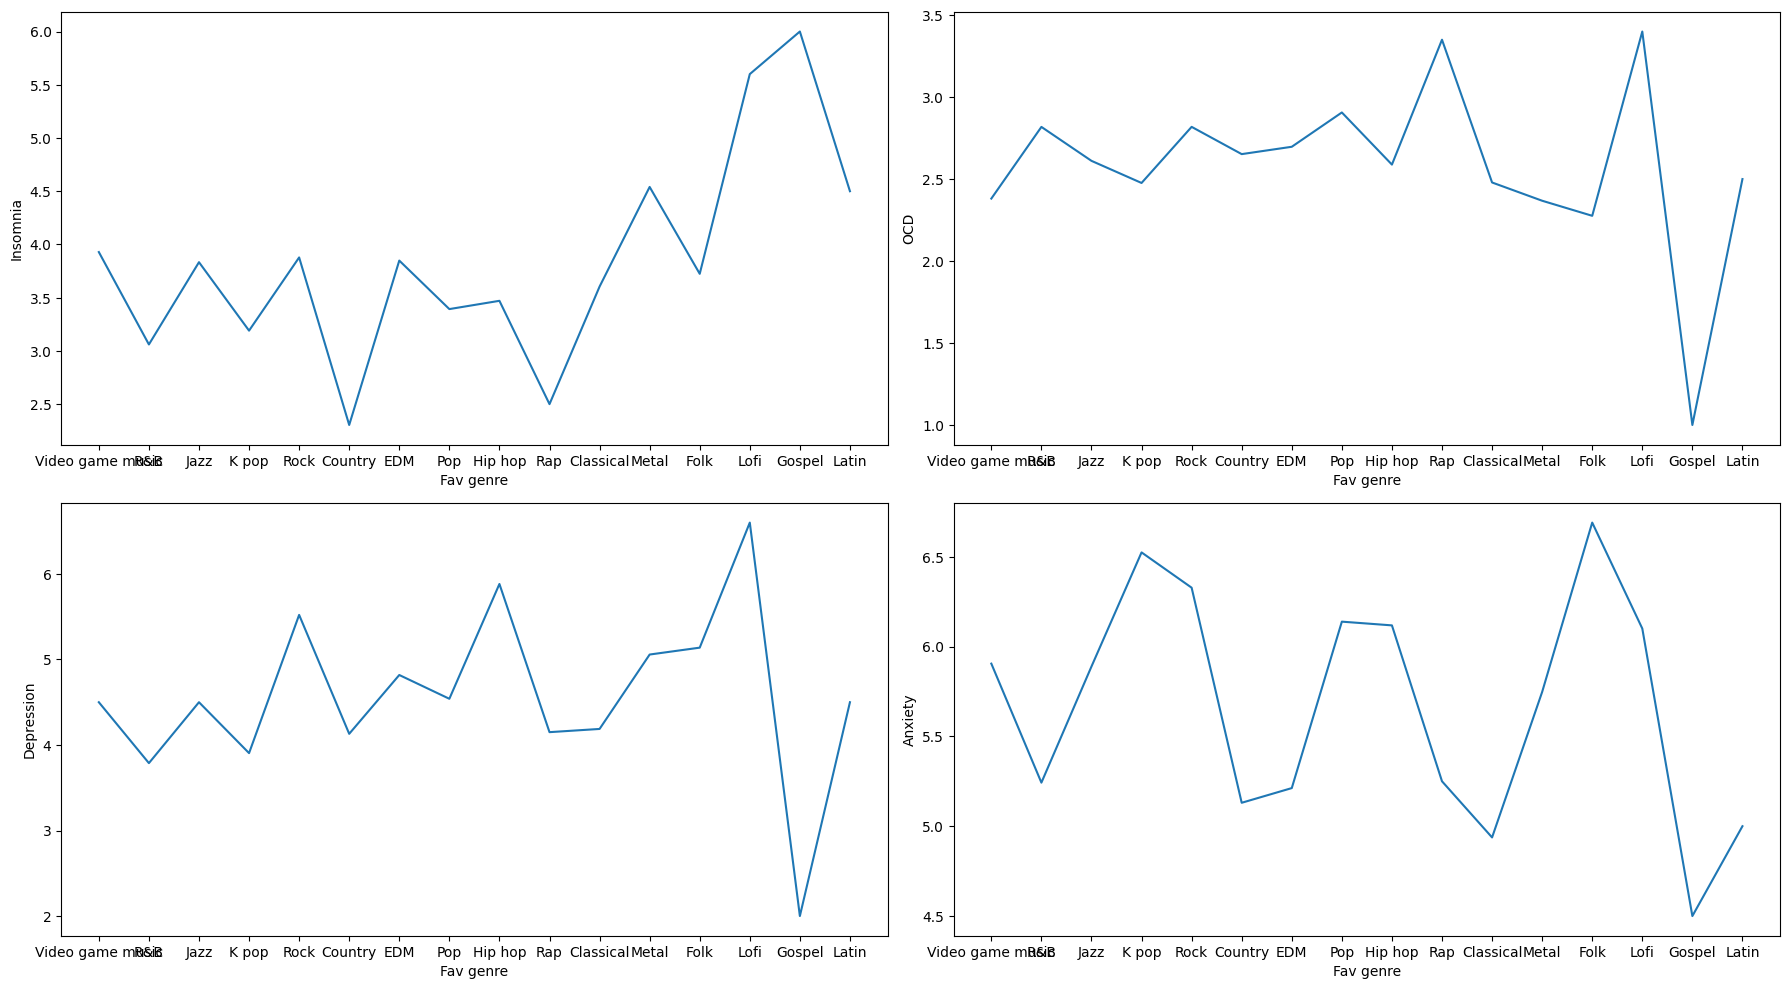

In [44]:
figure,axes=plt.subplots(2,2,figsize=(18,10))
sns.lineplot(ax=axes[0,0],x=music['Fav genre'],y=music['Insomnia'],ci=None)
sns.lineplot(ax=axes[0,1],x=music['Fav genre'],y=music['OCD'],ci=None)
sns.lineplot(ax=axes[1,0],x=music['Fav genre'],y=music['Depression'],ci=None)
sns.lineplot(ax=axes[1,1],x=music['Fav genre'],y=music['Anxiety'],ci=None)
plt.tight_layout()
plt.show()

1. Participants with high insomnia listen to gospel music most and country music the least
2. Participants with high OCD listen to Lofi & Rap music the most
3. Participants with high Depression listen to Lofi & Hip hop music the most
4. Participants with high Anxiety listen to Folk,K-pop, Jazz, Rock music the most

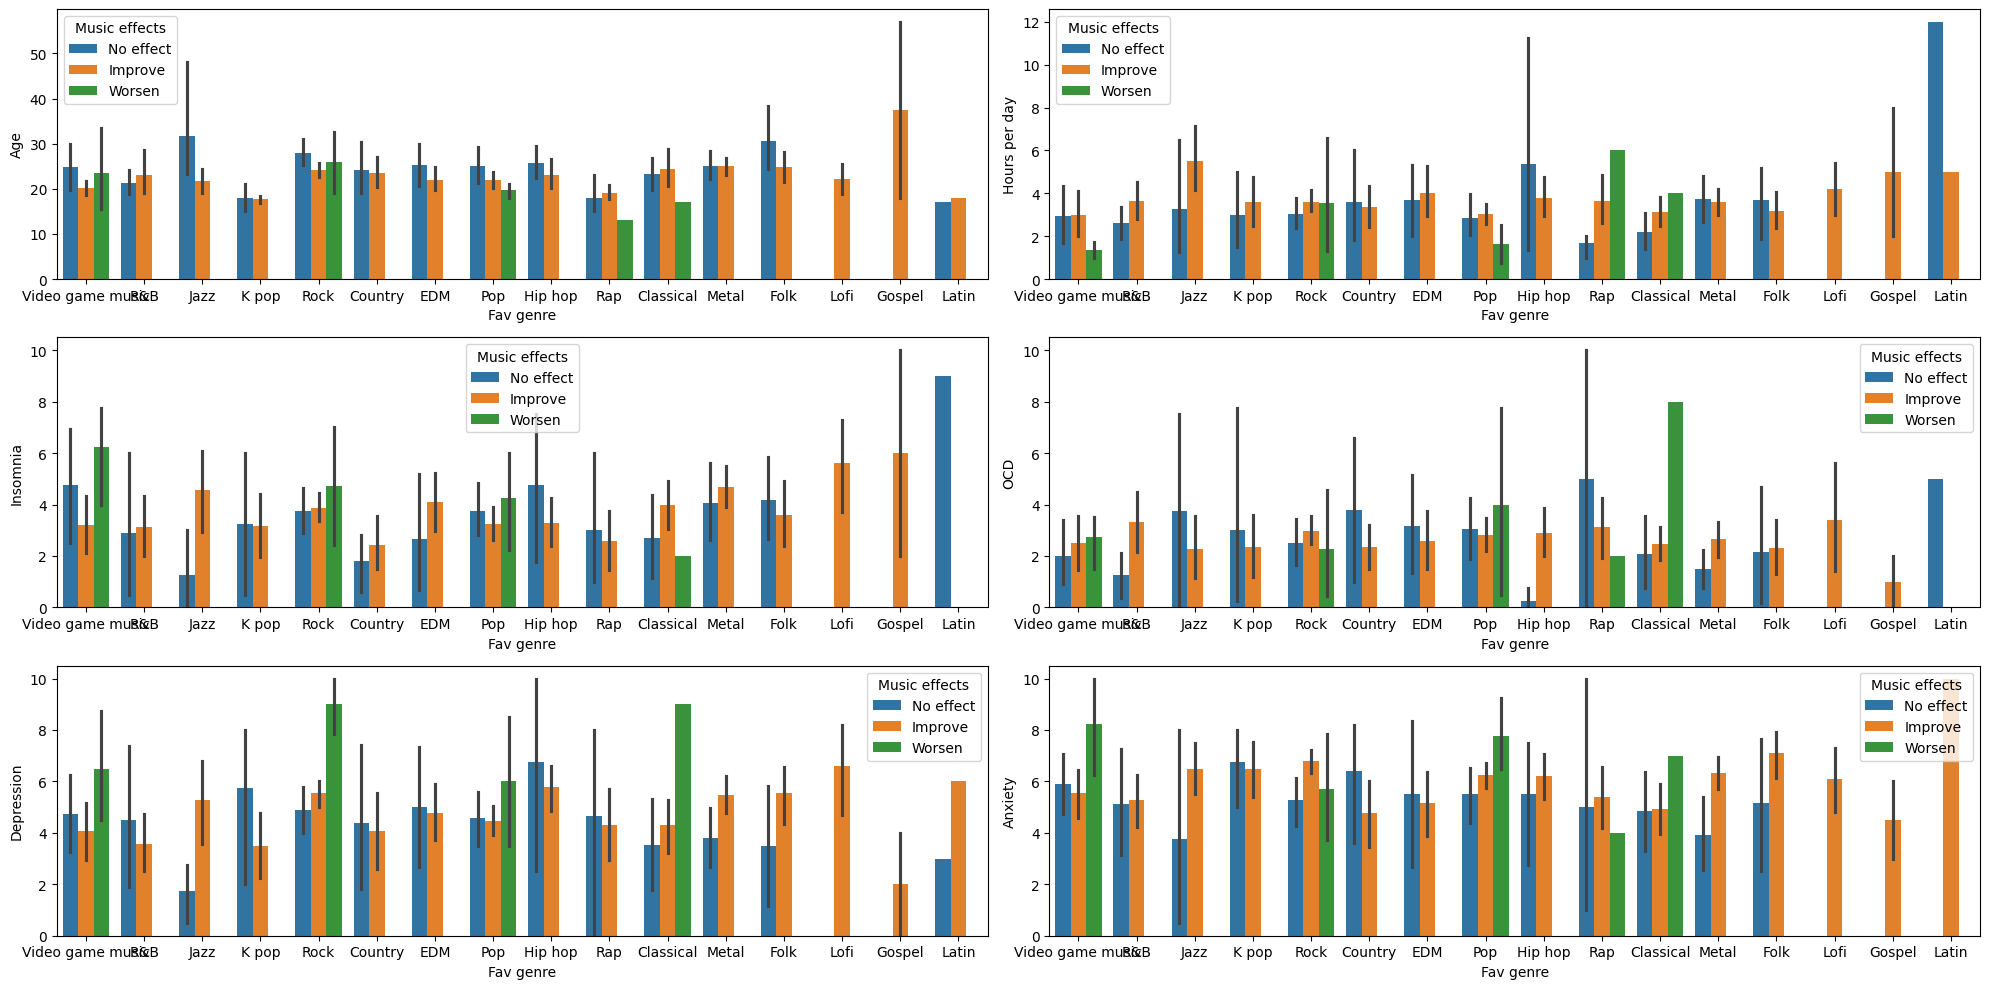

In [45]:
figure,axes=plt.subplots(3,2,figsize=(20,10))
sns.barplot(ax=axes[0,0],x=music['Fav genre'],y=music['Age'],hue=music['Music effects'])
sns.barplot(ax=axes[0,1],x=music['Fav genre'],y=music['Hours per day'],hue=music['Music effects'])
sns.barplot(ax=axes[1,0],x=music['Fav genre'],y=music['Insomnia'],hue=music['Music effects'])
sns.barplot(ax=axes[1,1],x=music['Fav genre'],y=music['OCD'],hue=music['Music effects'])
sns.barplot(ax=axes[2,0],x=music['Fav genre'],y=music['Depression'],hue=music['Music effects'])
sns.barplot(ax=axes[2,1],x=music['Fav genre'],y=music['Anxiety'],hue=music['Music effects'])
plt.tight_layout()
plt.show()

# From the above graphs we can say the following:

- **Gospel music is heard most by those dealing with insomnia** and in the higher age groups and among the participants it has helped improve the condition
- **Lofi music is heard most by those dealing with OCD, Anxiety and Depression and the age group is in mid 20's.** Among the participants it has helped imporve these conditions
- **Video game music has worsening effects on all mental health conditions and hence should be avoided.** Participants listening to video game music are usually in the early 20s age group which may have higher impact on their social functioning.
- **R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal and Latin music either have no effect or help in improving the condition. But do not have any negative effects.**
- **Rock music should be avoided by those dealing with Insomnia and Depression as it has chances of worsening the condition as compared to improving.**
- **Classical music should be avoided by those dealing with OCD,Anxiety and Depression as it has chances of worsening the condition as compared to improving.** **For Insomnia there are more chances of improvemnt in condition than worsening.**
- **Listening to Lofi and Gospel music for 4-6hrs can improve the consitions mentioned above.**
- **While Video game music and pop, if heard for even 2 hours showed worsening of conditions in some participants.**

# CONCLUSIONS IN BULLET POINTS 

Genres: R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal, Latin music, Gospel, Lofi, Rock

**INSOMNIA:**

**Helpful:**
1. Gospel music
2. Lofi music

**Should be Avoided:**
1. Rock music

**OCD:**

**Helpful:**
1. Lofi music

**R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal, Latin music (no negative effects)**

**Should be Avoided:**
1. Classical music

**ANXIETY:**

**Helpful:**
1. Lofi music

**R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal, Latin music (no negative effects)**

**Should be Avoided:**

1. Classical music

**DEPRESSION:**

**Helpful:**

1. Lofi music

**R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal, Latin music (no negative effects)**

**Should be Avoided:**

1. Rock music
2. Classical music

#**General Recommendations:**

- No Negative Effects: R&B, Jazz, K-pop, Country, EDM, Hip hop, Folk, Metal, Latin music

- Mixed Effects: Video game music (worsening effects for all conditions)

Duration Matters:
1. Listening to Lofi and Gospel music for 4-6 hours can improve conditions.
2. Video game music and pop, if heard for even 2 hours, showed worsening of conditions in some participants.

# Spotify API for the final tool for user

In [46]:
#!pip install spotipy

In [47]:
CLIENT_ID = getpass.getpass("Enter your Spotify Client ID: ")
CLIENT_SECRET = getpass.getpass("Enter your Spotify Client Secret: ")

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

Enter your Spotify Client ID:  ········
Enter your Spotify Client Secret:  ········


# FINAL TOOL FOR USER
User friendly tool where the user tells his mental health problem: **Insomnia, OCD, Depression, Anxiety,** and then it shows the 
top music of the genres that will help him improve and also the genres in a text that he should avoid. 

In [50]:
class User:
    def __init__(self, username, password, email=None):
        self.username = username
        self.password = password
        self.email = email

class Authenticate:
    def __init__(self, users):
        self._users_as_dict: Dict[str, User] = {user["username"]: User(**user) for user in users}

    def login(self, username, password):
        user = self._users_as_dict.get(username)
        if user and user.password == password:
            return True
        return False

def login_page(authenticator):
    global authentication_status, username
    print("Login")
    username_input = input("Username: ")
    password_input = input("Password: ")
    if authenticator.login(username_input, password_input):
        authentication_status = True
        username = username_input
        print(f'Welcome {username}')
    else:
        authentication_status = False
        print('Username/password is incorrect')

def display_content():
    print(f"Welcome to HarmonyHealing, {username}!")
    print("Here's some content related to mental well-being:")
    print("- Playlist 1: ...")
    print("- Playlist 2: ...")


def main():
    print("Your App Title")

    with open('credentials.txt') as file:
        config = yaml.load(file, Loader=SafeLoader)

    authenticator = Authenticate(config['credentials'])

    login_page(authenticator)

if __name__ == "__main__":
    main()


Your App Title
Login


Username:  mbourbon
Password:  abc


Welcome mbourbon


In [51]:
result_frame = None

mental_health_genres = {
    'OCD': ["Lo-fi", "Jazz", "Latin", "Country"],
    'Depression': ["Lo-fi", "Jazz", "Latin", "Country"],
    'Anxiety': ["Lo-fi", "Jazz", "Latin", "Country"],
    'Insomnia': ["Lo-fi", "Gospel"]
}

def open_url(url):
    webbrowser.open(url)

def display_playlists():
    global result_frame

    if result_frame and result_frame.winfo_exists():
        result_frame.destroy()

    result_frame = ttk.Frame(root)
    result_frame.grid(row=1, column=0, padx=10, pady=10, sticky="nsew", rowspan=3)

    text = tk.Text(result_frame, height=15, width=47)
    text.insert(tk.END, "Based on an analysis of a comprehensive survey dataset, the findings have showed genres that positively impact specific mental health issues, those that exhibit no discernible negative effects, and those that may have adverse implications. The subsequent categorization comprises genres associated with notable improvements as well as those that have no negative effects. This information aims to empower individuals in making informed choices to enhance their mental well-being. We express our gratitude and sincerely hope you find this insightful. Thank you and enjoy the journey towards improved mental health.")
    text.grid(row=0, column=0, padx=10, pady=10, sticky="w")

    chosen_issue = combo_var.get()

    if chosen_issue in mental_health_genres:
        genres = mental_health_genres[chosen_issue]

        if genres:
            result_text.delete(1.0, tk.END)

            result_text.insert(tk.END, f"Suggested genres for {chosen_issue}: {', '.join(genres)}\n\n")

            for genre in genres:
                try:
                    
                    print(f"Searching for playlist with genre: {genre}")

                    
                    playlists = sp.search(q=f"{genre}", type='playlist', limit=1)

                    if 'playlists' in playlists and 'items' in playlists['playlists']:
                        if playlists['playlists']['items']:
                            playlist = playlists['playlists']['items'][0]

                            playlist_info = f"Playlist for genre {genre}:\n" \
                                            f"{playlist['name']}\n" \
                                            f"   Followers: {playlist.get('followers', {}).get('total', 'Unknown')}\n"

                            result_text.insert(tk.END, f"{playlist_info}")
                            result_text.insert(tk.END, f"   Playlist URL: {playlist['external_urls']['spotify']} ({genre} genre)\n\n")

                            button_text = f"Open Playlist"
                            button = ttk.Button(result_frame, text=button_text, command=lambda u=playlist['external_urls']['spotify']: open_url(u))
                            button.grid(row=len(result_frame.grid_slaves()) + 1, column=2, padx=10, pady=10, sticky="w")

                            
                            try:
                                image_data = requests.get(playlist['images'][0]['url'], stream=True).content
                                image = Image.open(io.BytesIO(image_data))
                                image = image.resize((100, 100), Image.LANCZOS)
                                image_tk = ImageTk.PhotoImage(image)
                                image_label = ttk.Label(result_frame, image=image_tk)
                                image_label.grid(row=len(result_frame.grid_slaves()) + 1, column=1, padx=10, pady=10, sticky="w")
                            except PIL.UnidentifiedImageError:
                                result_text.insert(tk.END, f"Error: Unable to identify image for {genre}\n\n")

                            result_text.insert(tk.END, f"Found top playlist for {genre}\n\n")
                        else:
                            result_text.insert(tk.END, f"No playlist found for {genre}\n\n")
                    else:
                        result_text.insert(tk.END, "Error retrieving playlist information.\n\n")
                except spotipy.SpotifyException as e:
                    result_text.insert(tk.END, f"Error: {e}\n\n")
        else:
            result_text.insert(tk.END, f"No genres found for the selected mental health issue: {chosen_issue}\n\n")
    else:
        result_text.insert(tk.END, "Invalid choice. Please select a valid mental health issue.\n\n")

root = tk.Tk()
root.title("Mental Health Playlists")

combo_var = tk.StringVar()
combo_box = ttk.Combobox(root, textvariable=combo_var, values=list(mental_health_genres.keys()))
combo_box.set("Choose a mental health issue")
combo_box.grid(row=0, column=0, padx=10, pady=10, sticky="w")

result_text = tk.Text(root, height=20, width=80, wrap="word")
result_text.grid(row=0, column=1, padx=10, pady=10, sticky="nsew", rowspan=3)

scrollbar = ttk.Scrollbar(root, command=result_text.yview)
scrollbar.grid(row=0, column=2, pady=10, sticky="ns")

result_text.config(yscrollcommand=scrollbar.set)

search_button = ttk.Button(root, text="Search Playlists", command=display_playlists)
search_button.grid(row=2, column=0, pady=10, sticky="w", columnspan=2)

root.rowconfigure(1, weight=1)
root.columnconfigure(1, weight=1)

root.mainloop()


Searching for playlist with genre: Lo-fi
Searching for playlist with genre: Jazz
Searching for playlist with genre: Latin
Searching for playlist with genre: Country


# API from Wikipedia to search the definition of the mental health disorders and diseases available in the tool 
For presentation on Streamlit 

In [52]:
wiki_wiki = wikipediaapi.Wikipedia("en", headers={"User-Agent": "http://localhost:8501/Introduction"})


def search_wikipedia(searchterm: str) -> List[any]:
    page_py = wiki_wiki.page(searchterm)
    if page_py.exists():
        return [page_py.title, page_py.text]
    else:
        return []